In [1]:
import pandas as pd
import numpy as  np

In [2]:
s=pd.Series([2,3,3,4,np.nan,13,"s"])

print (s)

0      2
1      3
2      3
3      4
4    NaN
5     13
6      s
dtype: object


In [3]:
dates = pd.date_range('20130101',periods=6)


In [4]:
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
print (dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [6]:
df = pd.DataFrame(np.random.randn(10, 4))

In [7]:
df

,0,1,2,3
0,0.657731,-0.464626,-1.591038,-0.557930
1,0.761267,-0.142509,0.692230,-0.388996
2,0.695040,0.592760,0.301778,1.160791
3,0.933084,-1.087179,0.192624,-2.319665
4,1.303787,-0.506126,0.422333,1.322604
5,0.028249,0.301564,0.500743,-0.588416
6,1.001438,-0.084306,-1.588924,-1.401789
7,-0.717317,1.254521,-3.312966,-0.147498
8,0.504886,0.629086,0.214957,-0.656237
9,2.139079,1.129861,-0.049152,-0.185762


In [8]:
pieces = [df[:3], df[3:7], df[7:]]
pieces
pd.concat(pieces)

,0,1,2,3
0,0.657731,-0.464626,-1.591038,-0.557930
1,0.761267,-0.142509,0.692230,-0.388996
2,0.695040,0.592760,0.301778,1.160791
3,0.933084,-1.087179,0.192624,-2.319665
4,1.303787,-0.506126,0.422333,1.322604
5,0.028249,0.301564,0.500743,-0.588416
6,1.001438,-0.084306,-1.588924,-1.401789
7,-0.717317,1.254521,-3.312966,-0.147498
8,0.504886,0.629086,0.214957,-0.656237
9,2.139079,1.129861,-0.049152,-0.185762


In [9]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [10]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})



In [11]:
df

,A,B,C,D
0,foo,one,-0.023568,1.329540
1,bar,one,-1.674913,-1.061038
2,foo,two,1.229471,-1.179596
3,bar,three,0.830009,-2.078070
4,foo,two,0.466427,0.502362
5,bar,two,-0.709415,-1.073004
6,foo,one,1.062214,-1.155783
7,foo,three,-0.776092,-0.633439


In [12]:
df.groupby('A').sum()


,C,D
A,,
bar,-1.554319,-4.212112
foo,1.958453,-1.136916


In [13]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.674913 -1.061038
    three  0.830009 -2.078070
    two   -0.709415 -1.073004
foo one    1.038646  0.173758
    three -0.776092 -0.633439
    two    1.695898 -0.677234

In [14]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [15]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [16]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
stack=df.stack()
stack

first  second   
bar    one     A   -0.017315
               B    0.593256
       two     A    0.346899
               B    0.668139
baz    one     A    0.428358
               B   -0.295521
       two     A   -1.890242
               B    1.347158
foo    one     A   -0.048025
               B    1.050724
       two     A   -0.570847
               B    0.273321
qux    one     A   -0.060882
               B    1.514874
       two     A    0.607941
               B   -0.854375
dtype: float64

In [17]:
df

A         B
first second                    
bar   one    -0.017315  0.593256
      two     0.346899  0.668139
baz   one     0.428358 -0.295521
      two    -1.890242  1.347158
foo   one    -0.048025  1.050724
      two    -0.570847  0.273321
qux   one    -0.060882  1.514874
      two     0.607941 -0.854375

In [18]:
rng = pd.date_range('1/1/2012', periods=100, freq='T')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:01:00',
               '2012-01-01 00:02:00', '2012-01-01 00:03:00',
               '2012-01-01 00:04:00', '2012-01-01 00:05:00',
               '2012-01-01 00:06:00', '2012-01-01 00:07:00',
               '2012-01-01 00:08:00', '2012-01-01 00:09:00',
               '2012-01-01 00:10:00', '2012-01-01 00:11:00',
               '2012-01-01 00:12:00', '2012-01-01 00:13:00',
               '2012-01-01 00:14:00', '2012-01-01 00:15:00',
               '2012-01-01 00:16:00', '2012-01-01 00:17:00',
               '2012-01-01 00:18:00', '2012-01-01 00:19:00',
               '2012-01-01 00:20:00', '2012-01-01 00:21:00',
               '2012-01-01 00:22:00', '2012-01-01 00:23:00',
               '2012-01-01 00:24:00', '2012-01-01 00:25:00',
               '2012-01-01 00:26:00', '2012-01-01 00:27:00',
               '2012-01-01 00:28:00', '2012-01-01 00:29:00',
               '2012-01-01 00:30:00', '2012-01-01 00:31:00',
               '2012-01-

In [19]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    428
2012-01-01 00:01:00    180
2012-01-01 00:02:00    491
2012-01-01 00:03:00    113
2012-01-01 00:04:00    295
2012-01-01 00:05:00     60
2012-01-01 00:06:00    122
2012-01-01 00:07:00      1
2012-01-01 00:08:00    387
2012-01-01 00:09:00    411
2012-01-01 00:10:00    236
2012-01-01 00:11:00    349
2012-01-01 00:12:00    464
2012-01-01 00:13:00    482
2012-01-01 00:14:00    164
2012-01-01 00:15:00    139
2012-01-01 00:16:00    141
2012-01-01 00:17:00     95
2012-01-01 00:18:00      0
2012-01-01 00:19:00     54
2012-01-01 00:20:00    362
2012-01-01 00:21:00    427
2012-01-01 00:22:00    310
2012-01-01 00:23:00    232
2012-01-01 00:24:00    272
2012-01-01 00:25:00     83
2012-01-01 00:26:00    256
2012-01-01 00:27:00     84
2012-01-01 00:28:00    288
2012-01-01 00:29:00    147
                      ... 
2012-01-01 01:10:00     44
2012-01-01 01:11:00     26
2012-01-01 01:12:00    126
2012-01-01 01:13:00    203
2012-01-01 01:14:00    171
2012-01-01 01:15:00    297
2

In [20]:
ts.resample('5Min',how='sum')

/home/nishchay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01 00:00:00    1507
2012-01-01 00:05:00     981
2012-01-01 00:10:00    1695
2012-01-01 00:15:00     429
2012-01-01 00:20:00    1603
2012-01-01 00:25:00     858
2012-01-01 00:30:00    1009
2012-01-01 00:35:00    1427
2012-01-01 00:40:00    1576
2012-01-01 00:45:00    1387
2012-01-01 00:50:00    1141
2012-01-01 00:55:00    1424
2012-01-01 01:00:00    1761
2012-01-01 01:05:00    1318
2012-01-01 01:10:00     570
2012-01-01 01:15:00    1027
2012-01-01 01:20:00     911
2012-01-01 01:25:00    1019
2012-01-01 01:30:00     543
2012-01-01 01:35:00    1104
Freq: 5T, dtype: int64

In [21]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [22]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [23]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -1.018993
1990Q2   -0.556604
1990Q3    0.176235
1990Q4    0.078432
1991Q1   -1.583576
1991Q2    0.424799
1991Q3   -1.228510
1991Q4   -0.332635
1992Q1    0.732891
1992Q2   -1.763728
1992Q3    0.165715
1992Q4   -0.562953
1993Q1    0.095000
1993Q2    0.074698
1993Q3    0.770984
1993Q4   -0.513612
1994Q1   -0.107542
1994Q2    2.396457
1994Q3   -0.417577
1994Q4   -1.563214
1995Q1    0.826959
1995Q2   -0.366461
1995Q3   -0.145608
1995Q4    0.116389
1996Q1   -0.788197
1996Q2    0.461204
1996Q3    0.147017
1996Q4   -0.153564
1997Q1   -0.416883
1997Q2   -0.911640
1997Q3    0.729976
1997Q4    1.508708
1998Q1    1.820051
1998Q2    0.136942
1998Q3    0.459655
1998Q4    0.639440
1999Q1    1.338392
1999Q2    0.458426
1999Q3    0.547361
1999Q4    1.165844
2000Q1   -2.017821
2000Q2   -0.739817
2000Q3    1.004622
2000Q4    0.311913
Freq: Q-NOV, dtype: float64

In [24]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00   -1.018993
1990-06-01 09:00   -0.556604
1990-09-01 09:00    0.176235
1990-12-01 09:00    0.078432
1991-03-01 09:00   -1.583576
1991-06-01 09:00    0.424799
1991-09-01 09:00   -1.228510
1991-12-01 09:00   -0.332635
1992-03-01 09:00    0.732891
1992-06-01 09:00   -1.763728
1992-09-01 09:00    0.165715
1992-12-01 09:00   -0.562953
1993-03-01 09:00    0.095000
1993-06-01 09:00    0.074698
1993-09-01 09:00    0.770984
1993-12-01 09:00   -0.513612
1994-03-01 09:00   -0.107542
1994-06-01 09:00    2.396457
1994-09-01 09:00   -0.417577
1994-12-01 09:00   -1.563214
1995-03-01 09:00    0.826959
1995-06-01 09:00   -0.366461
1995-09-01 09:00   -0.145608
1995-12-01 09:00    0.116389
1996-03-01 09:00   -0.788197
1996-06-01 09:00    0.461204
1996-09-01 09:00    0.147017
1996-12-01 09:00   -0.153564
1997-03-01 09:00   -0.416883
1997-06-01 09:00   -0.911640
1997-09-01 09:00    0.729976
1997-12-01 09:00    1.508708
1998-03-01 09:00    1.820051
1998-06-01 09:00    0.136942
1998-09-01 09:

In [25]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"]=df["raw_grade"].astype["category"]

TypeError: 'method' object is not subscriptable

In [ ]:
df

In [26]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

In [ ]:
ts = ts.cumsum()
ts

In [ ]:
import matplotlib.pyplot as plt
ts.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df=df.cumsum()
df.plot()

In [ ]:
df.to_csv('foo.csv')

In [ ]:
pd.read_csv('foo.csv')

In [ ]:
def num_missing(x):
  return sum(x.isnull())

In [ ]:
num_missing(2)

In [ ]:
import pandas as pd
df=pd.read_csv('CAvideos.csv')

In [ ]:
df.max()

In [ ]:
df.head()
print ("-------------")
df.tail()

In [ ]:
df2=df[df[video_error_or_removed] =="False"]

In [ ]:
df.describe()

In [ ]:
df.sort(columns='video_error_or_removed')

In [ ]:
df.shape()

In [ ]:
df.info()

In [27]:
df=pd.read_csv('heroes_information.csv')

In [28]:
df.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [30]:
df.corr()

,Unnamed: 0,Height,Weight
Unnamed: 0,1.000000,0.042915,0.065094
Height,0.042915,1.000000,0.683375
Weight,0.065094,0.683375,1.000000


In [31]:
df.sort_values(['Weight'],ascending=False)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
575,575,Sasquatch,Male,red,-,Orange,305.0,Marvel Comics,-,good,900.0
373,373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,-,neutral,855.0
203,203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
331,331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
283,283,Giganta,Female,green,-,Red,62.5,DC Comics,-,bad,630.0
549,549,Red Hulk,Male,yellow,Human / Radiation,Black,213.0,Marvel Comics,red,neutral,630.0
119,119,Bloodaxe,Female,blue,Human,Brown,218.0,Marvel Comics,-,bad,495.0
718,718,Wolfsbane,Female,green,-,Auburn,366.0,Marvel Comics,-,good,473.0
657,657,Thanos,Male,red,Eternal,No Hair,201.0,Marvel Comics,purple,bad,443.0
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0


In [32]:
df.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [33]:
import matplotlib.pyplot as plt


In [36]:
df.index

RangeIndex(start=0, stop=734, step=1)

In [38]:
humanHero=df[df['Race'].isin(['Human'])]

In [39]:
humanHero.groupby(['Publisher'])

In [42]:
df=pd.read_csv('FINAL_FROM_DF.csv')

In [57]:
df2=df[df['SYMBOL'].isin(['20MICRONS'])]
df2

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,9.946579e+05,2017-06-28,202,INE144J01027
1738,20MICRONS,EQ,52.90,61.70,52.90,59.40,59.65,52.80,2489935,1.481265e+08,2017-11-28,14196,INE144J01027
3565,20MICRONS,EQ,36.15,36.30,35.60,36.05,36.00,35.65,40594,1.461975e+06,2017-02-28,193,INE144J01027
5292,20MICRONS,EQ,44.35,44.80,43.55,43.90,43.60,44.80,90170,3.984352e+06,2017-04-28,597,INE144J01027
7042,20MICRONS,EQ,36.00,36.75,34.20,34.90,34.90,35.40,77310,2.709788e+06,2017-03-20,413,INE144J01027
8799,20MICRONS,EQ,40.80,41.80,40.70,41.55,41.65,40.30,153277,6.340591e+06,2017-01-23,1008,INE144J01027
10524,20MICRONS,EQ,43.20,43.40,40.95,41.20,41.00,42.65,75641,3.161354e+06,2017-05-12,518,INE144J01027
12294,20MICRONS,EQ,35.25,35.60,35.00,35.10,35.10,35.15,49925,1.757306e+06,2017-03-28,185,INE144J01027
14039,20MICRONS,EQ,43.10,44.50,42.90,43.25,43.05,42.95,157311,6.899810e+06,2017-04-20,917,INE144J01027
15786,20MICRONS,EQ,35.00,35.00,34.10,34.50,34.75,34.60,13743,4.739993e+05,2017-08-16,177,INE144J01027


In [56]:
df2=df2.sort_values(['TIMESTAMP'],ascending=True)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [50]:
df2.to_csv('20MICRONS_NSE.csv')

In [58]:
df2=df2.values

In [59]:
df2

array([['20MICRONS', 'EQ', 37.8, ..., '2017-06-28', 202, 'INE144J01027'],
       ['20MICRONS', 'EQ', 52.9, ..., '2017-11-28', 14196,
        'INE144J01027'],
       ['20MICRONS', 'EQ', 36.15, ..., '2017-02-28', 193, 'INE144J01027'],
       ...,
       ['20MICRONS', 'EQ', 32.4, ..., '2016-04-08', 203, 'INE144J01027'],
       ['20MICRONS', 'EQ', 38.1, ..., '2016-09-23', 877, 'INE144J01027'],
       ['20MICRONS', 'EQ', 60.1, ..., '2017-12-29', 1391, 'INE144J01027']],
      dtype=object)

In [62]:
df2.shape[0]

495

In [63]:
df=pd.read_csv('20MICRONS_NSE.csv')

In [ ]:
df=pd.read_csv('iris.csv')

In [129]:
df2=df.iloc[:,[0,1,4]]
df2

,Sepal length,Sepal width,Class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa
8,4.4,2.9,Iris-setosa
9,4.9,3.1,Iris-setosa


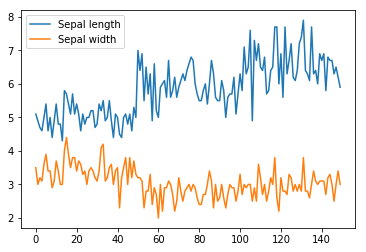

In [130]:
import matplotlib.pyplot as pl
df2.plot()

In [131]:
df2['Area']=df2['Sepal length'] * df2['Sepal width']
df2

/home/nishchay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sepal length,Sepal width,Class,Area
0,5.1,3.5,Iris-setosa,17.85
1,4.9,3.0,Iris-setosa,14.70
2,4.7,3.2,Iris-setosa,15.04
3,4.6,3.1,Iris-setosa,14.26
4,5.0,3.6,Iris-setosa,18.00
5,5.4,3.9,Iris-setosa,21.06
6,4.6,3.4,Iris-setosa,15.64
7,5.0,3.4,Iris-setosa,17.00
8,4.4,2.9,Iris-setosa,12.76
9,4.9,3.1,Iris-setosa,15.19


In [124]:
df_setosa=df2[df2['Class'].isin(['Iris-setosa'])]
df_versicolor=df2[df2['Class'].isin(['Iris-versicolor'])]
df_virginica=df2[df2['Class'].isin(['Iris-virginica'])]

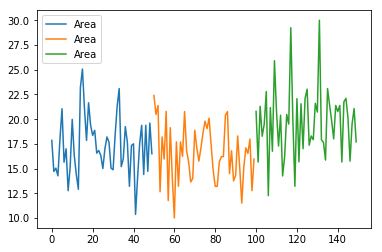

In [125]:
a=df_setosa.iloc[:,2:4].plot()
df_versicolor.iloc[:,2:4].plot(ax=a)
df_virginica.iloc[:,2:4].plot(ax=a)

In [132]:
df2['Class']=df2['Class'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],['0','1','2'])
df2.to_csv('tria.csv')

/home/nishchay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
df2.iloc[:,2].values

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2'], dtype=object)

In [141]:
pd.get_dummies(df,prefix=['Class'])

,Sepal length,Sepal width,Petal length,Petal width,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


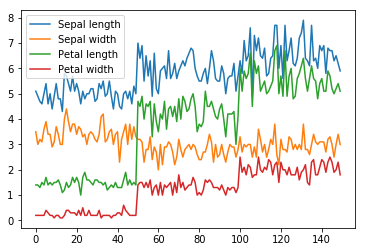

In [142]:
df.plot()